In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')


In [80]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0    1       3          alfa-romero giulia        gas      std        two        convertible  rwd        front          88.6       168.8      64.1      48.8       2548        dohc       four           130         mpfi       3.47       2.68    9.0               111         5000     21       27          13495.0
1    2       3          alfa-romero stelvio       gas      std        two        convertible  rwd        front          88.6       168.8      64.1      48.8       2548        dohc       four           130         mpfi       3.47       2.68    9.0               111         5000     21       27          16500.0
2    3       1          alfa-romero Q

In [81]:
df.shape

(205, 26)

In [82]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [83]:
df=df.set_index('car_ID')

In [84]:
df.describe

<bound method NDFrame.describe of         symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
car_ID                                                                                                                                                                                                                                                                                                           
1       3          alfa-romero giulia        gas      std        two        convertible  rwd        front          88.6       168.8      64.1      48.8       2548        dohc       four           130         mpfi       3.47       2.68    9.0               111         5000     21       27          13495.0
2       3          alfa-romero stelvio       gas

In [85]:
df.describe(include=object)

CarName fueltype aspiration doornumber carbody drivewheel enginelocation enginetype cylindernumber fuelsystem
count   205            205      205        205        205     205        205            205        205            205      
unique  147            2        2          2          5       3          2              7          7              8        
top     toyota corona  gas      std        four       sedan   fwd        front          ohc        four           mpfi     
freq    6              185      168        115        96      120        202            148        159            94

In [86]:
print(f'The null values are below \n {df.isna().sum()}')

The null values are below 
 symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [87]:
print(f'duplicated values are \n {df.duplicated().sum()}')

duplicated values are 
 0


In [88]:
uniquecars=[]
uniquecars=df['CarName'].unique()
print(uniquecars)

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [89]:
def car_brand_name(car_name):
    return car_name.split(' ')[0].lower()

In [90]:
df['CarName']=[car_brand_name(car_brand) for car_brand in df['CarName']]
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [91]:
#Correcting some car names
df['CarName'] = df['CarName'].replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].replace('maxda', 'mazda')
df['CarName'] = df['CarName'].replace('porcshce', 'porsche')

In [92]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [93]:
def get_column_values(column):
    print(column.value_counts().reset_index())



---------------------------------

 Visualizing ofCarName
        CarName  count
0   toyota       32   
1   nissan       18   
2   mazda        17   
3   mitsubishi   13   
4   honda        13   
5   volkswagen   12   
6   subaru       12   
7   peugeot      11   
8   volvo        11   
9   dodge        9    
10  buick        8    
11  bmw          8    
12  audi         7    
13  plymouth     7    
14  saab         6    
15  porsche      5    
16  isuzu        4    
17  jaguar       3    
18  chevrolet    3    
19  alfa-romero  3    
20  renault      2    
21  mercury      1    


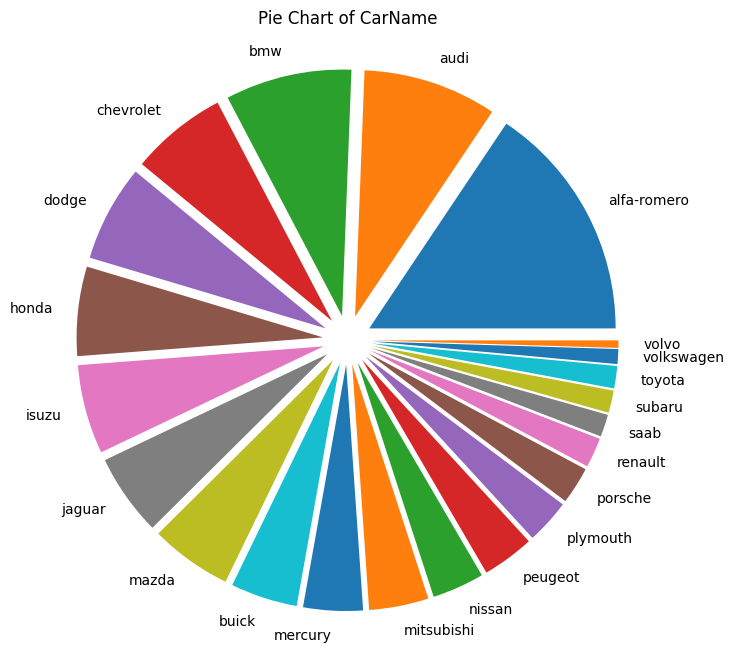

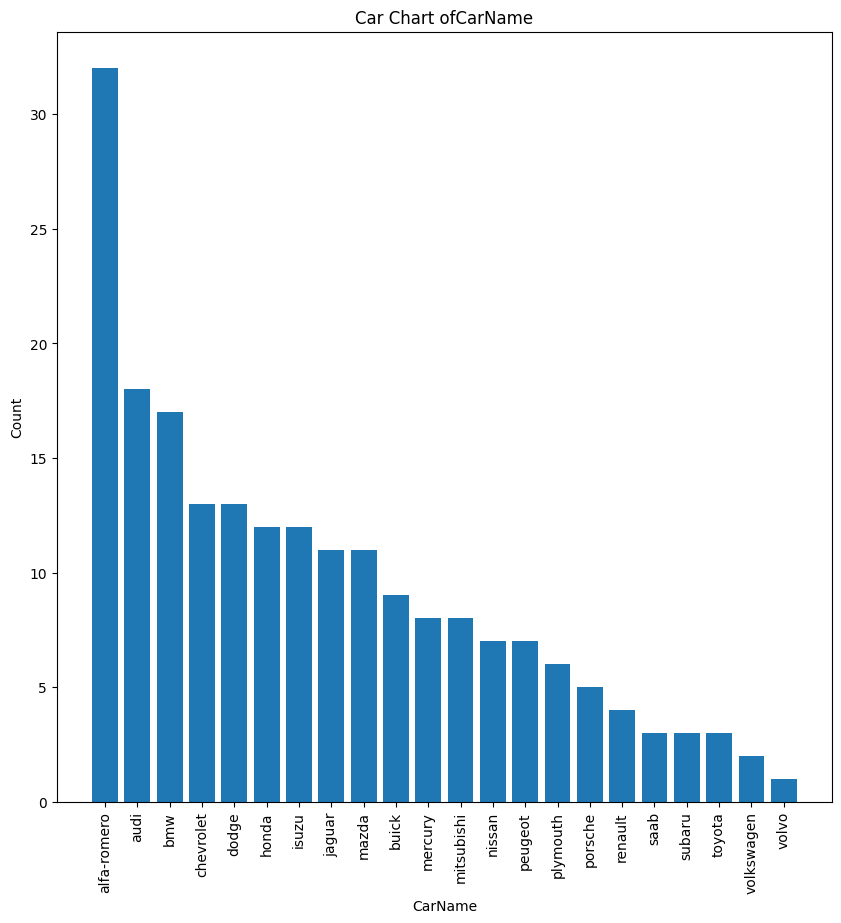



---------------------------------

 Visualizing offueltype
  fueltype  count
0  gas      185  
1  diesel   20   


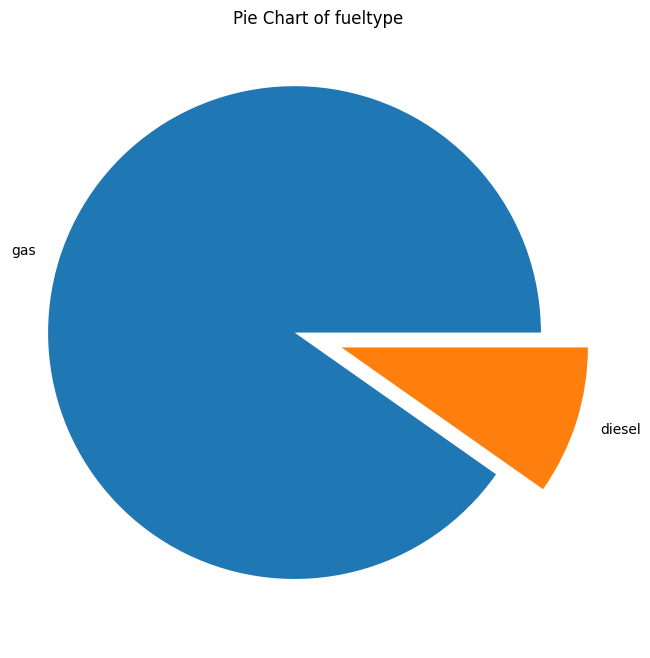

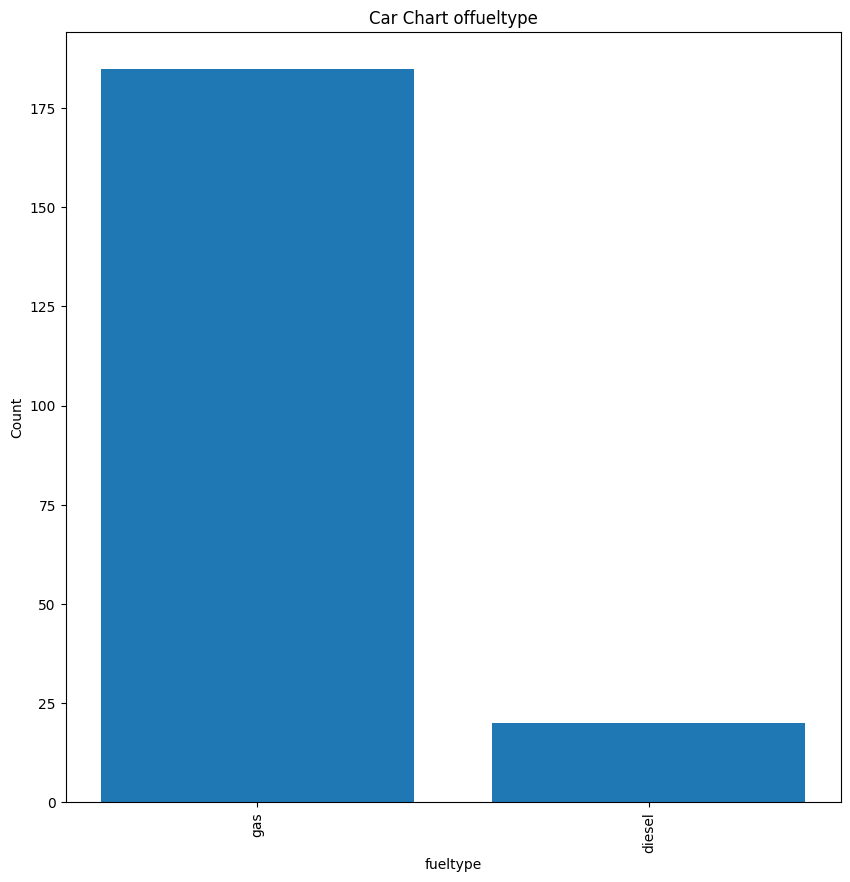



---------------------------------

 Visualizing ofaspiration
  aspiration  count
0  std        168  
1  turbo      37   


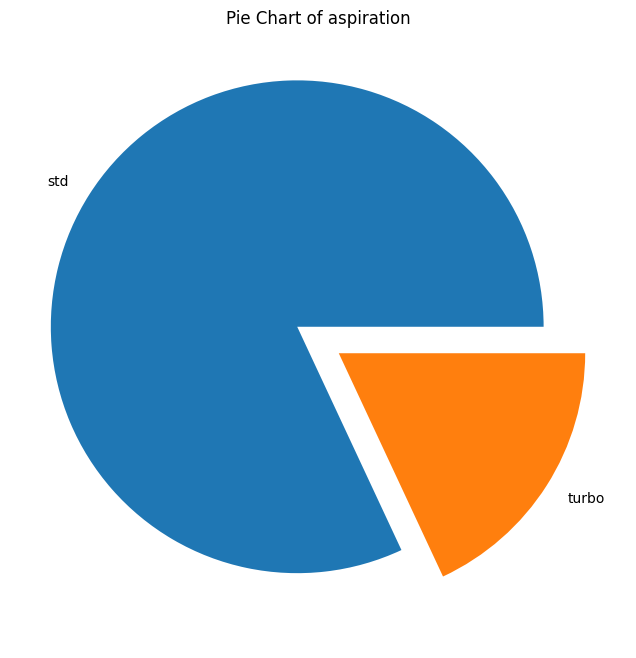

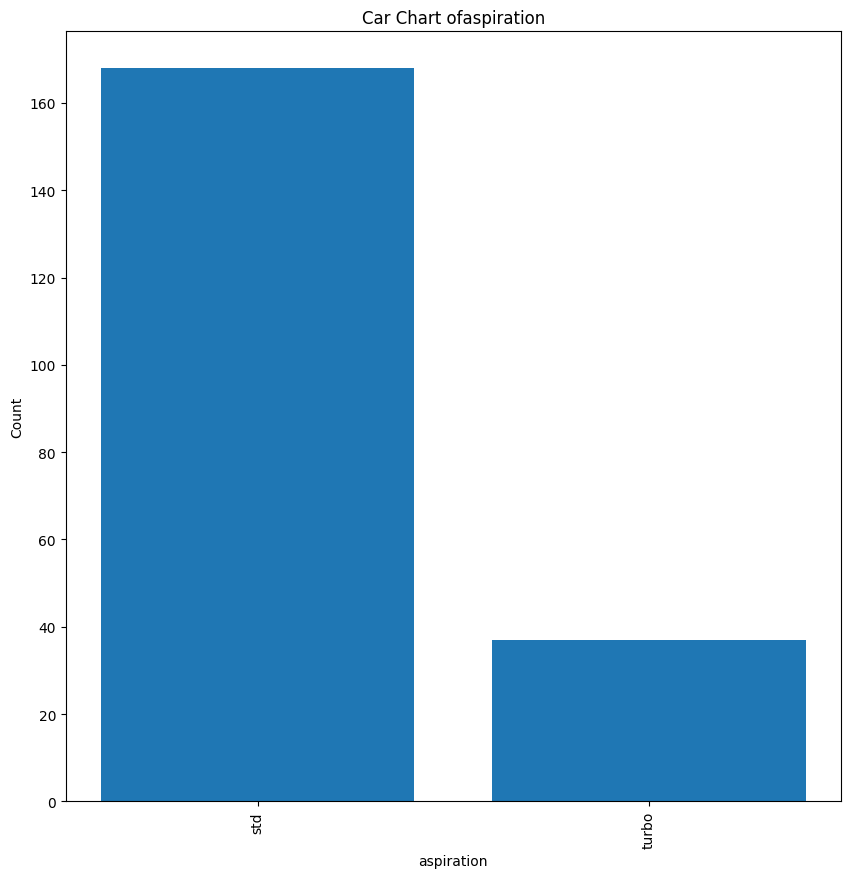



---------------------------------

 Visualizing ofdoornumber
  doornumber  count
0  four       115  
1  two        90   


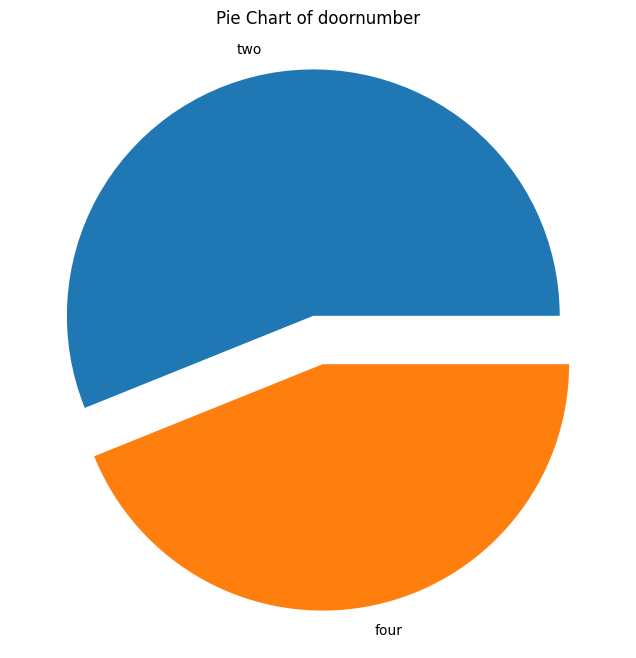

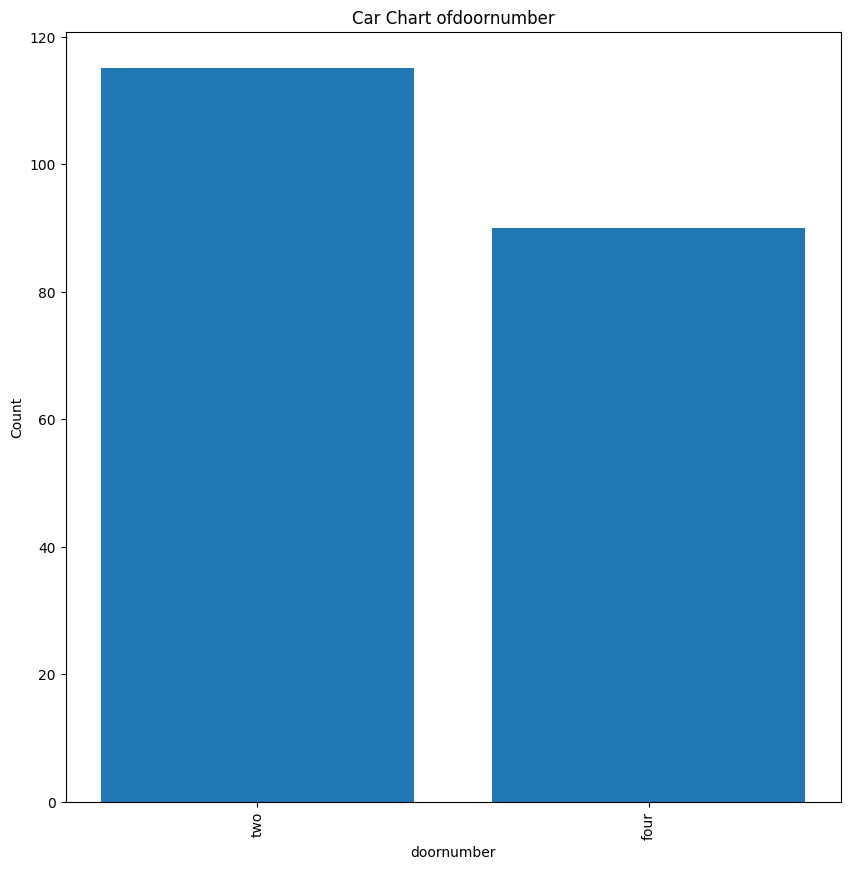



---------------------------------

 Visualizing ofcarbody
       carbody  count
0  sedan        96   
1  hatchback    70   
2  wagon        25   
3  hardtop      8    
4  convertible  6    


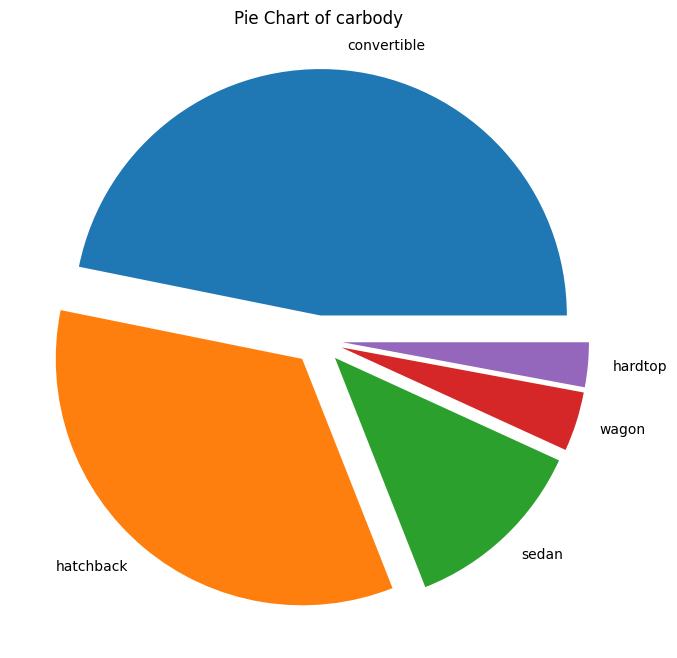

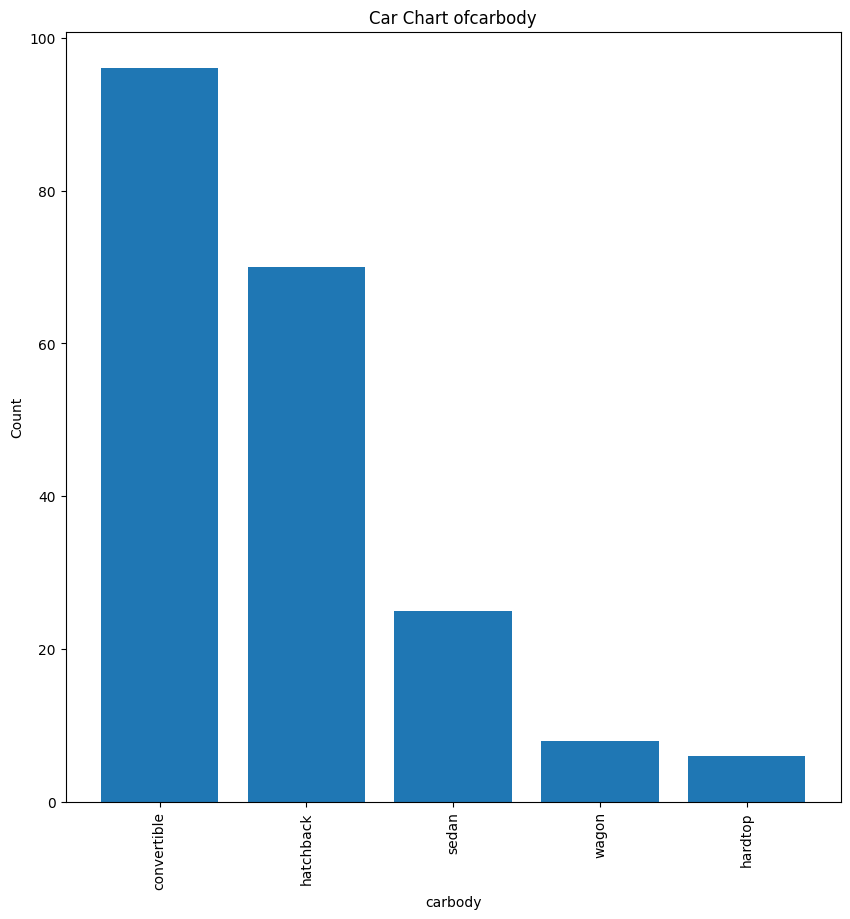



---------------------------------

 Visualizing ofdrivewheel
  drivewheel  count
0  fwd        120  
1  rwd        76   
2  4wd        9    


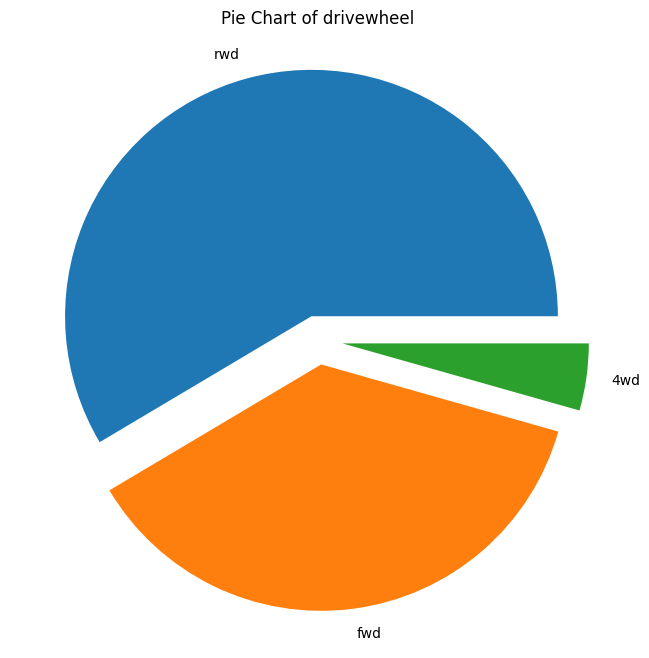

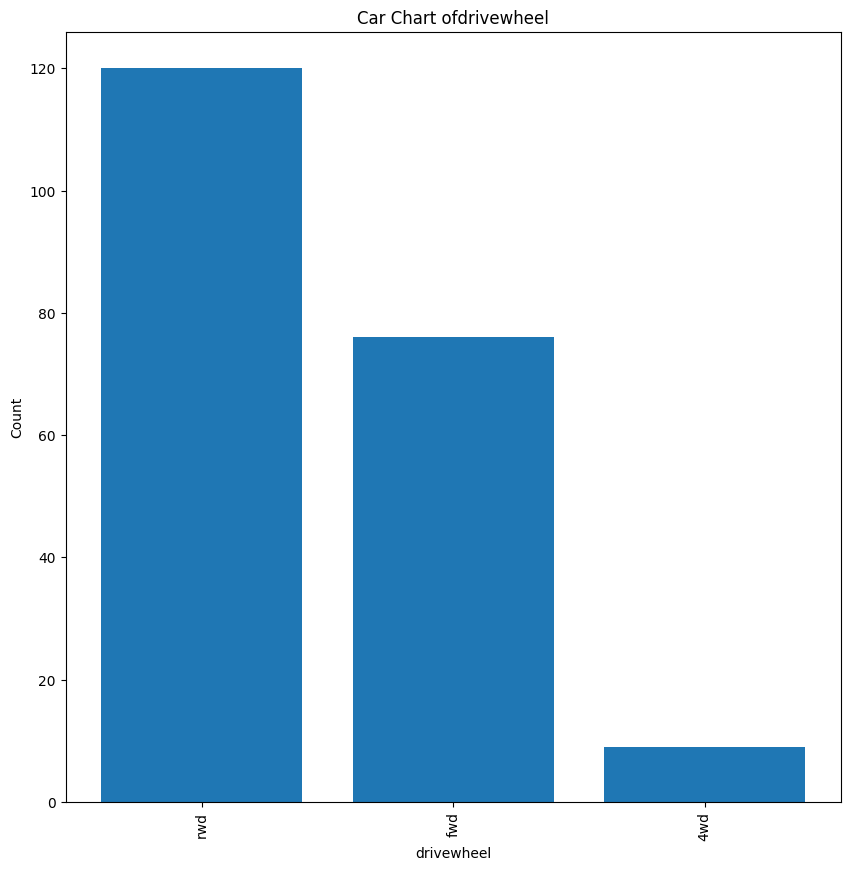



---------------------------------

 Visualizing ofenginelocation
  enginelocation  count
0  front          202  
1  rear           3    


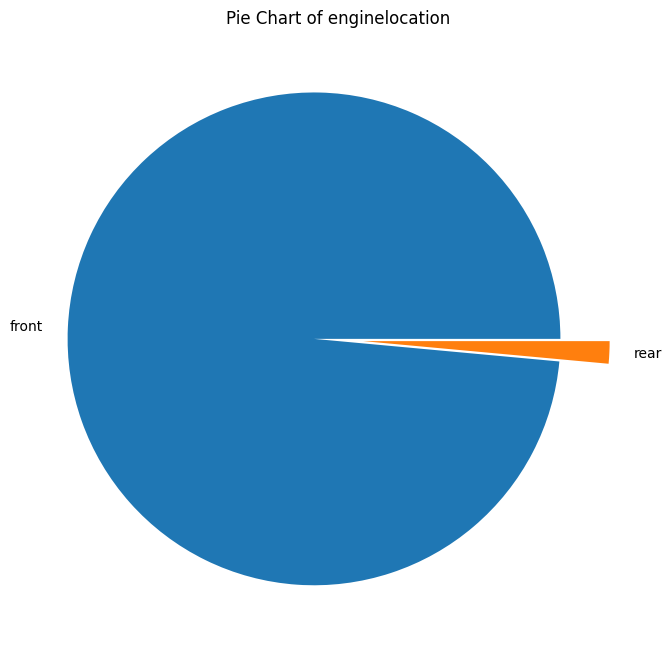

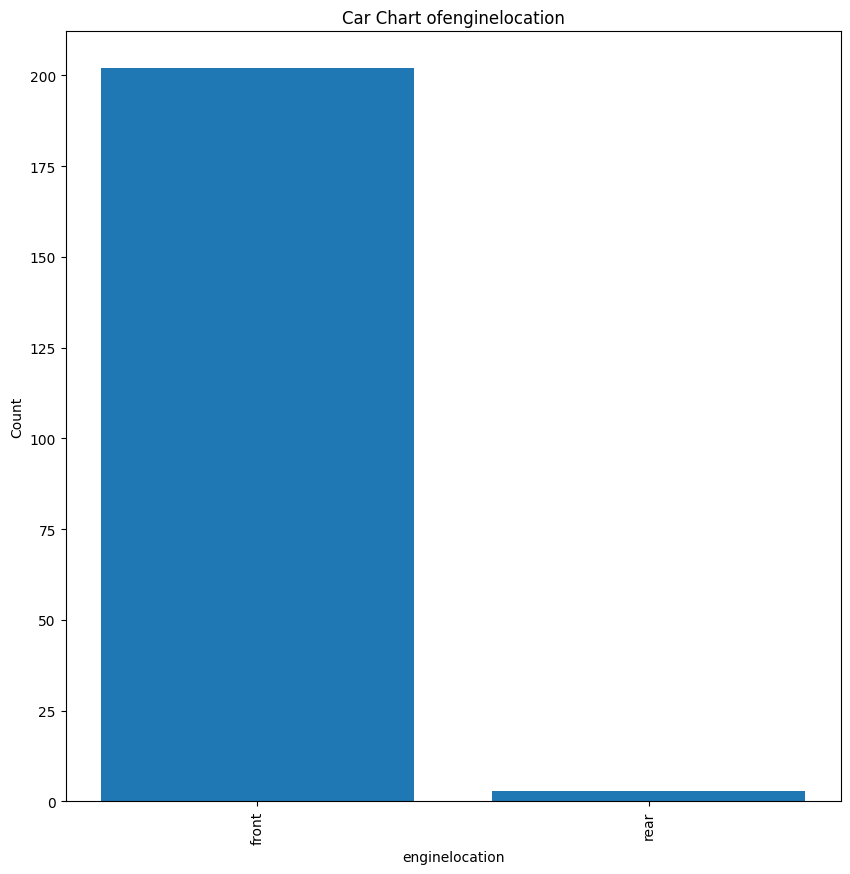



---------------------------------

 Visualizing ofenginetype
  enginetype  count
0  ohc        148  
1  ohcf       15   
2  ohcv       13   
3  dohc       12   
4  l          12   
5  rotor      4    
6  dohcv      1    


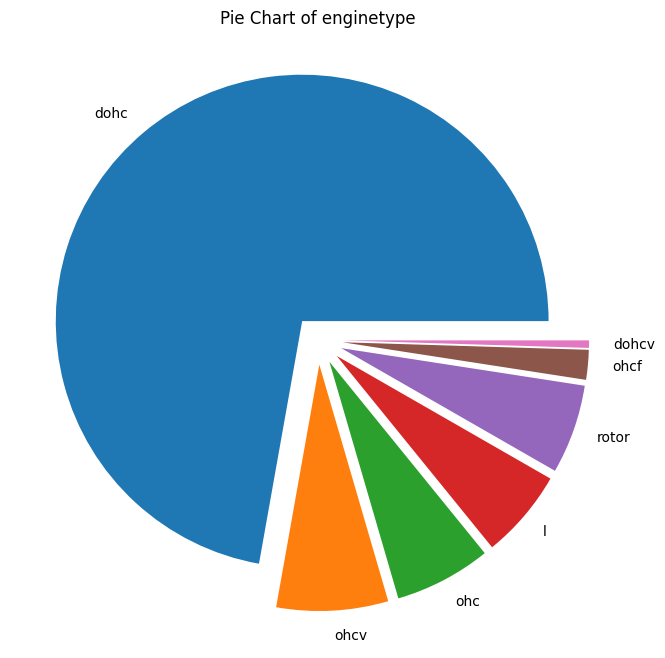

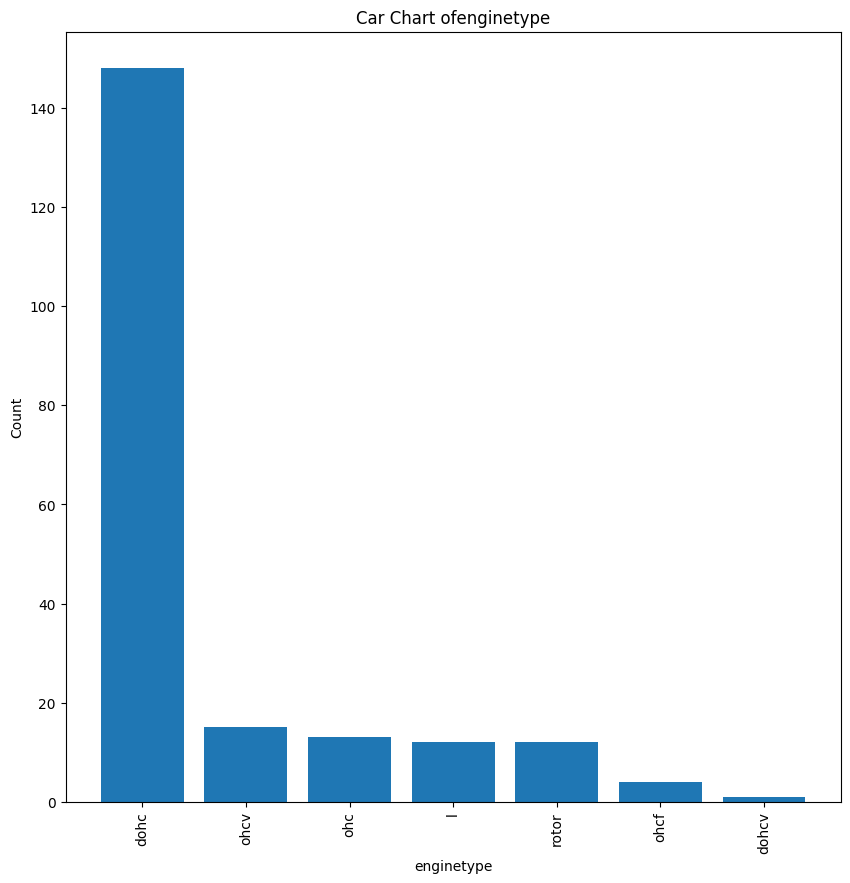



---------------------------------

 Visualizing ofcylindernumber
  cylindernumber  count
0  four           159  
1  six            24   
2  five           11   
3  eight          5    
4  two            4    
5  three          1    
6  twelve         1    


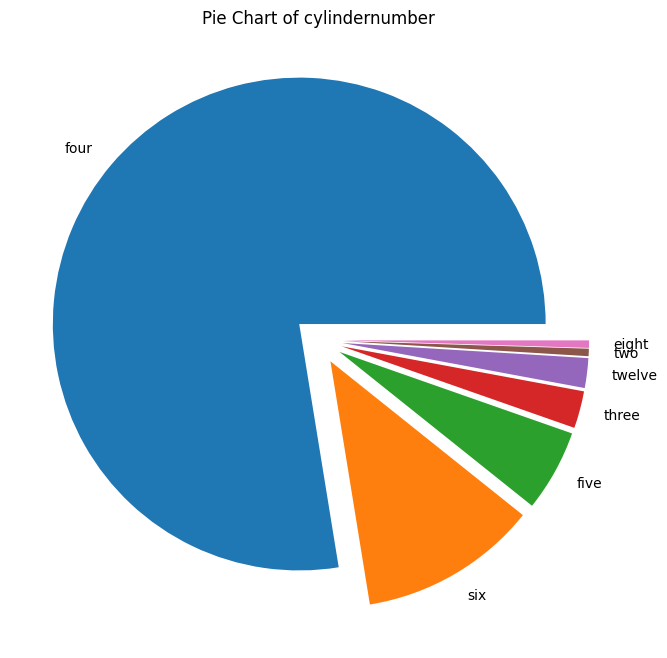

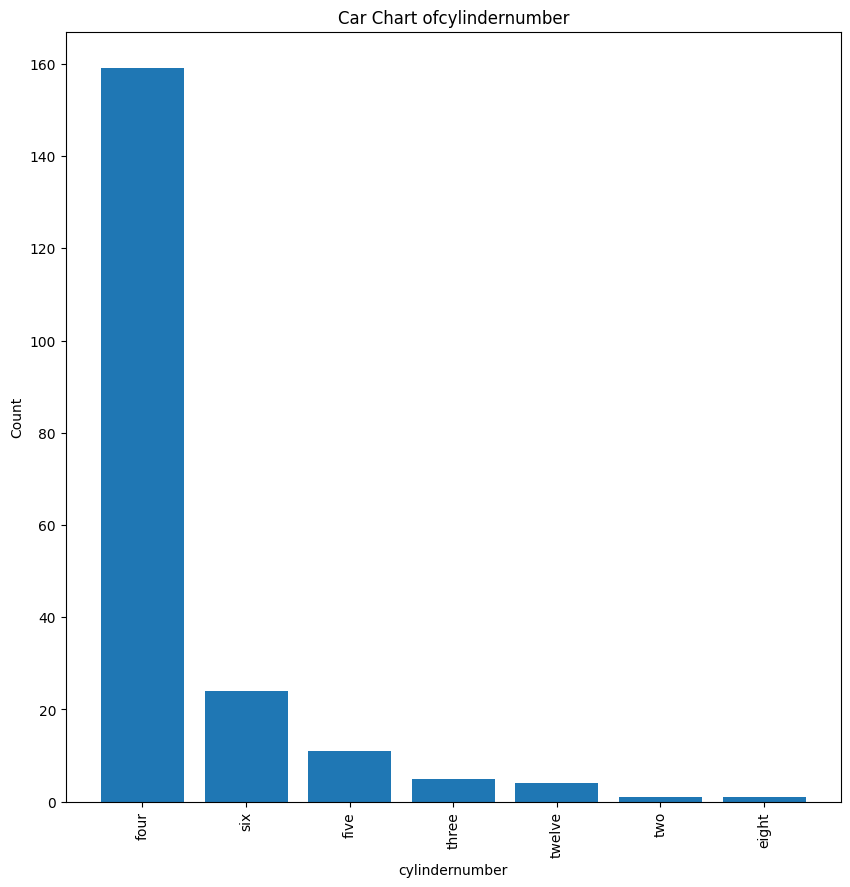



---------------------------------

 Visualizing offuelsystem
  fuelsystem  count
0  mpfi       94   
1  2bbl       66   
2  idi        20   
3  1bbl       11   
4  spdi       9    
5  4bbl       3    
6  mfi        1    
7  spfi       1    


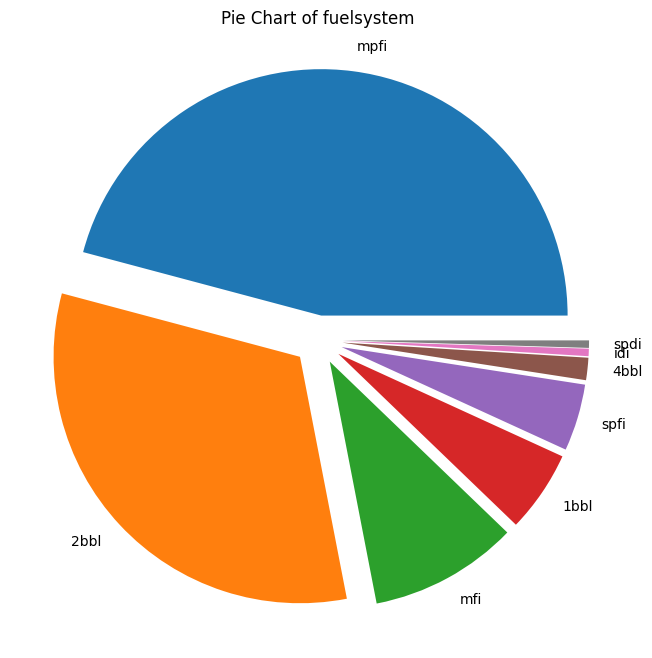

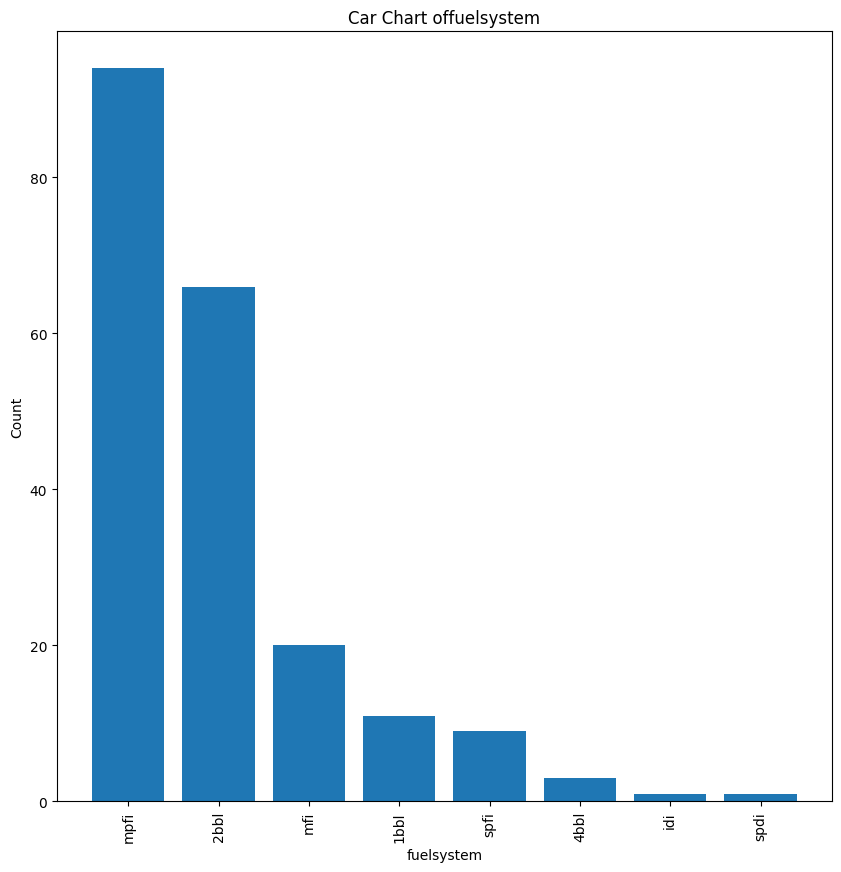

In [94]:
def show_charts(column):
    print(f'\n\n---------------------------------\n\n Visualizing of{column.name}')
    
    get_column_values(column)
    plt.figure(figsize=(8,8))
    plt.pie(column.value_counts(), labels=column.unique(), explode = [0.1 for i in range(len(column.unique()))])
    plt.title(f'Pie Chart of {column.name}')
    plt.show()

    plt.figure(figsize=(10,10))
    plt.bar(column.unique(), column.value_counts())
    plt.xlabel(column.name)
    plt.ylabel('Count')
    plt.title(f'Car Chart of{column.name}')
    plt.xticks(rotation=90)
    plt.show()

show_charts(df['CarName'])
show_charts(df['fueltype'])
show_charts(df['aspiration'])
show_charts(df['doornumber'])
show_charts(df['carbody'])
show_charts(df['drivewheel'])
show_charts(df['enginelocation'])
show_charts(df['enginetype'])
show_charts(df['cylindernumber'])
show_charts(df['fuelsystem'])

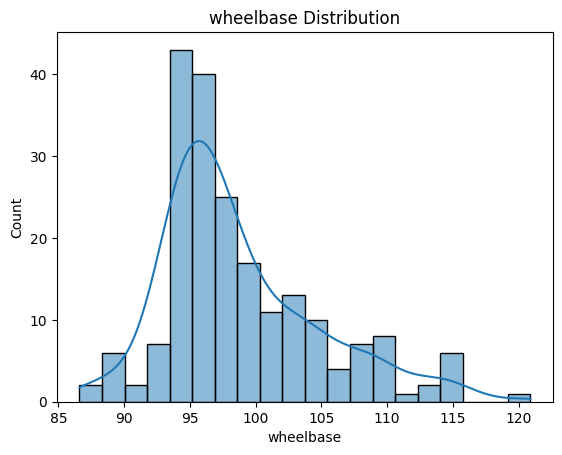

count    205.000000
mean     98.756585 
std      6.021776  
min      86.600000 
25%      94.500000 
50%      97.000000 
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64


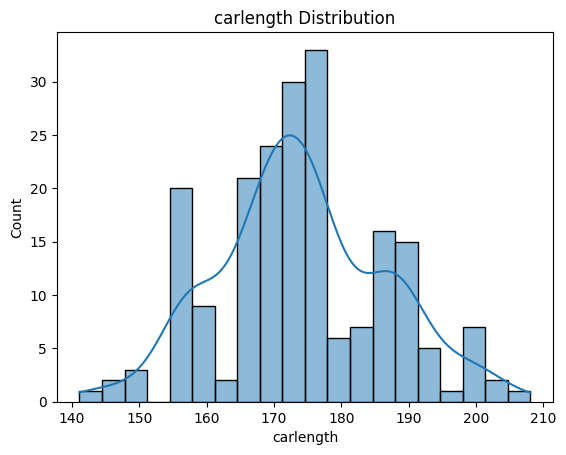

count    205.000000
mean     174.049268
std      12.337289 
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64


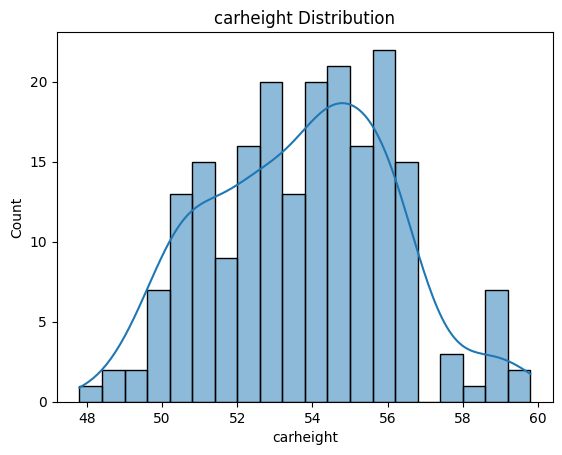

count    205.000000
mean     53.724878 
std      2.443522  
min      47.800000 
25%      52.000000 
50%      54.100000 
75%      55.500000 
max      59.800000 
Name: carheight, dtype: float64


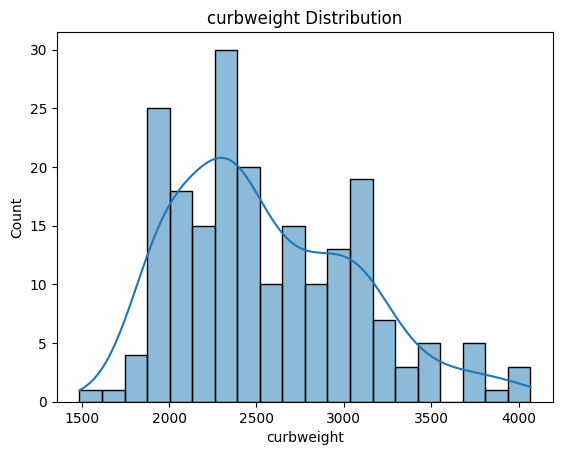

count    205.000000 
mean     2555.565854
std      520.680204 
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64


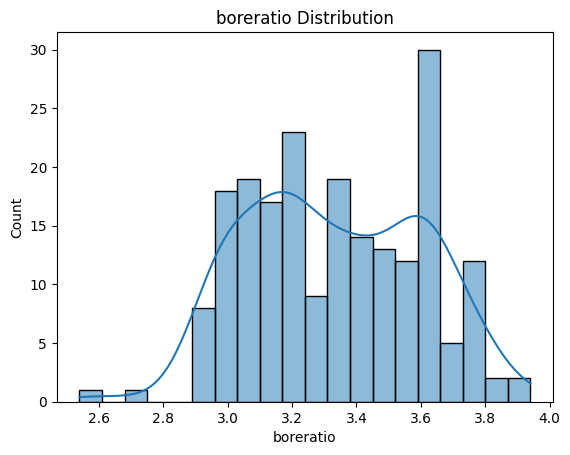

count    205.000000
mean     3.329756  
std      0.270844  
min      2.540000  
25%      3.150000  
50%      3.310000  
75%      3.580000  
max      3.940000  
Name: boreratio, dtype: float64


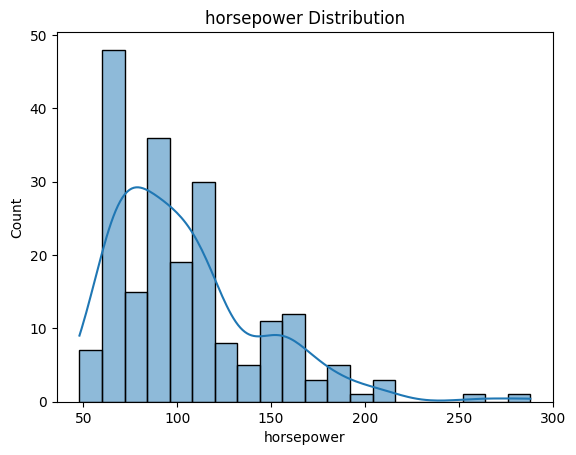

count    205.000000
mean     104.117073
std      39.544167 
min      48.000000 
25%      70.000000 
50%      95.000000 
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64


In [95]:
def histogram(column):
    sns.histplot(data=column, bins=20, kde=True)
    plt.title(f'{column.name} Distribution')
    plt.show()
    print(column.describe())

histogram(df['wheelbase'])
histogram(df['carlength'])
histogram(df['carheight'])
histogram(df['curbweight'])
histogram(df['boreratio'])
histogram(df['horsepower'])

In [96]:
#Collecting categorical data 
Categorical_columns, numerical_columns =[],[]
Categorical_columns=df.select_dtypes(include=object).columns.tolist()
#Collecting numerical data
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

In [97]:
Categorical_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [98]:
numerical_columns

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

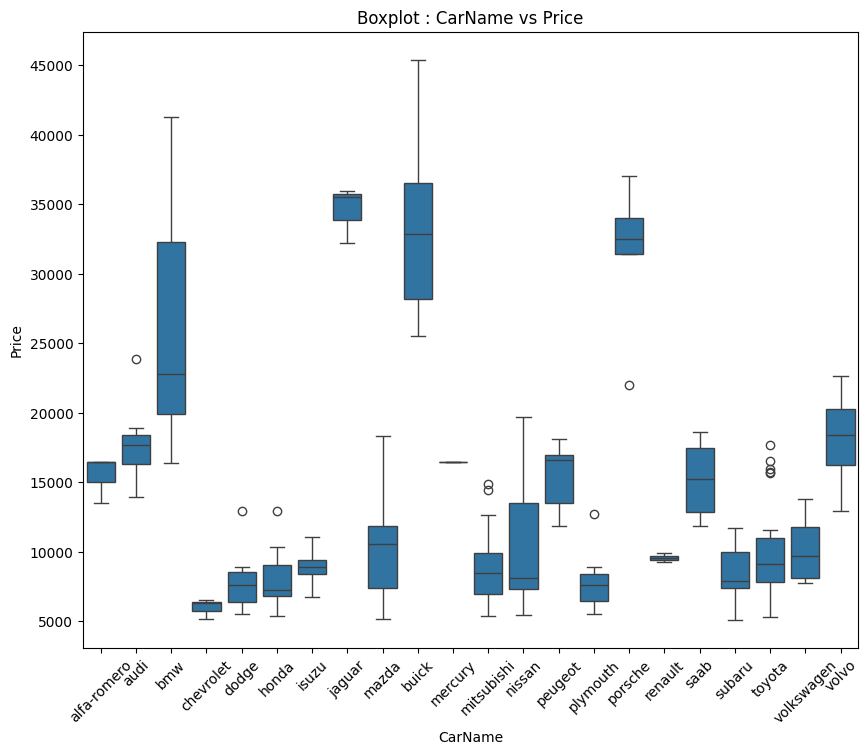

count     205   
unique    22    
top       toyota
freq      32    
Name: CarName, dtype: object


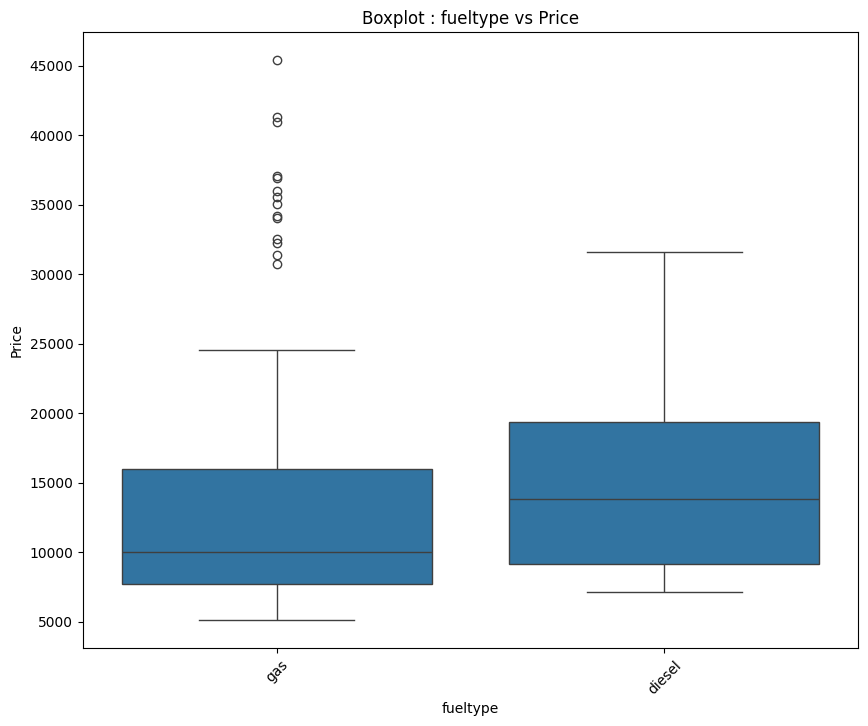

count     205
unique    2  
top       gas
freq      185
Name: fueltype, dtype: object


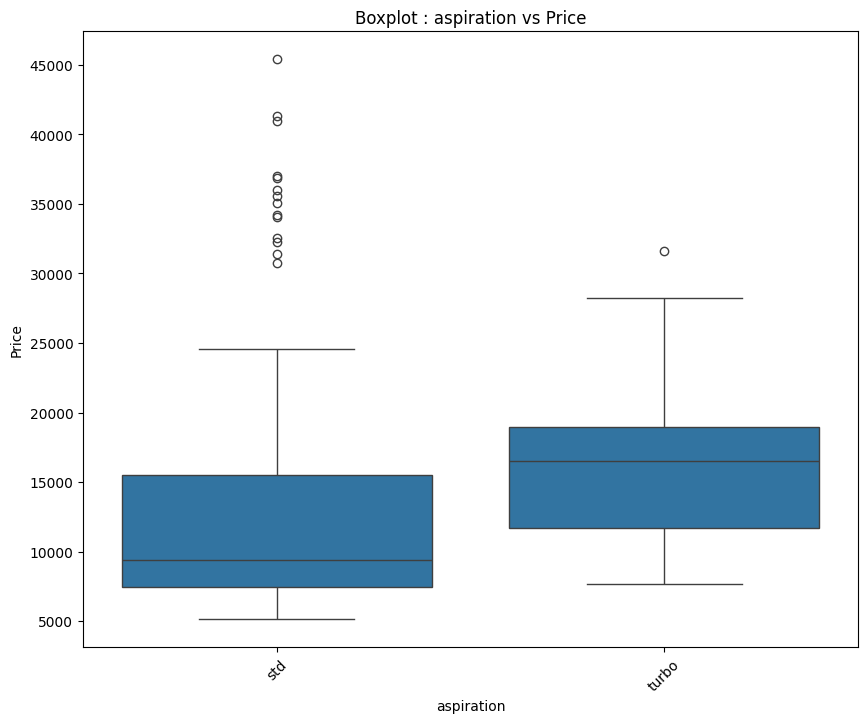

count     205
unique    2  
top       std
freq      168
Name: aspiration, dtype: object


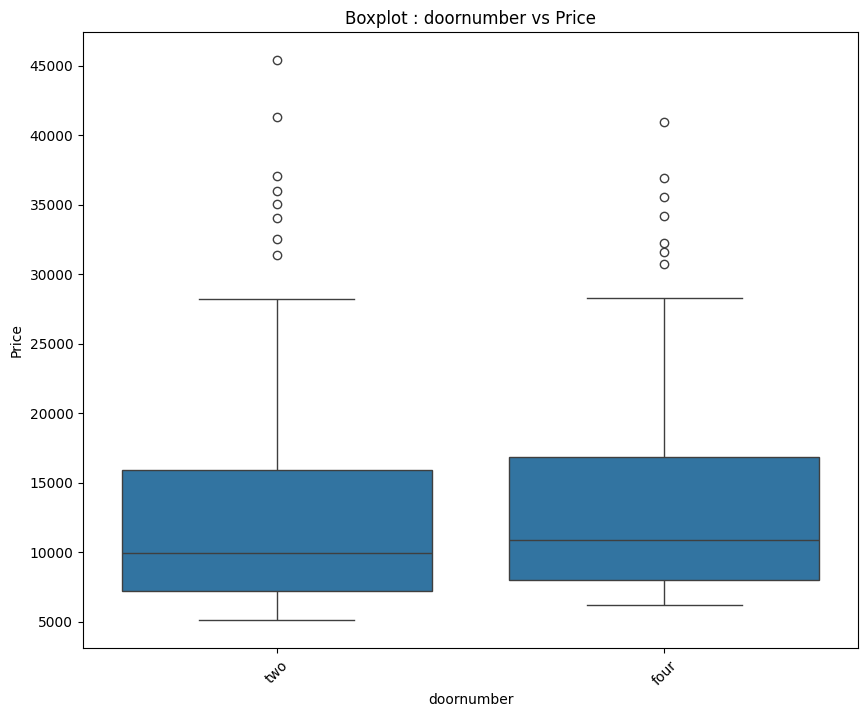

count     205 
unique    2   
top       four
freq      115 
Name: doornumber, dtype: object


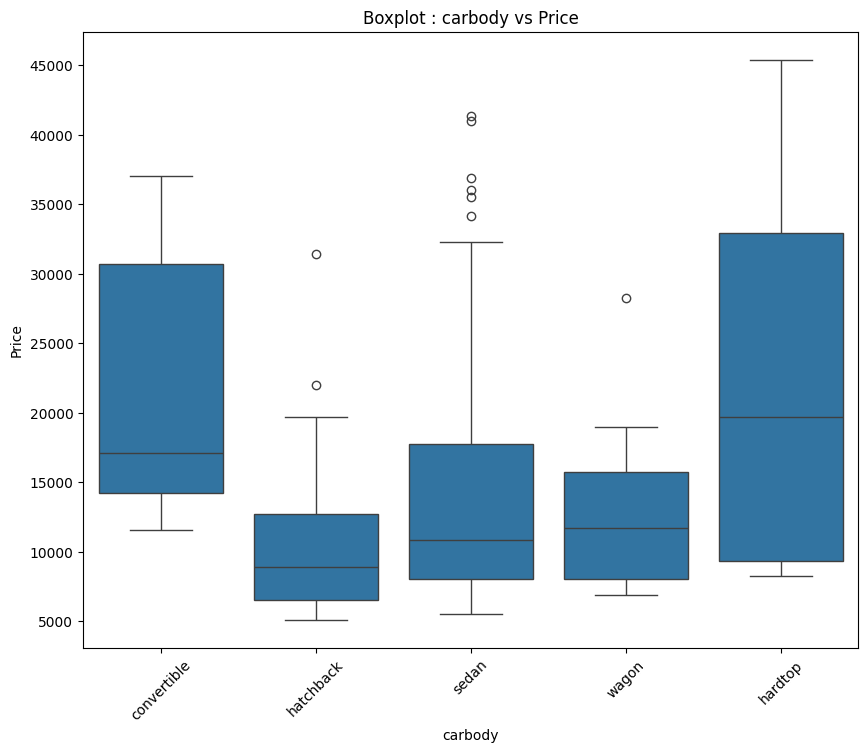

count     205  
unique    5    
top       sedan
freq      96   
Name: carbody, dtype: object


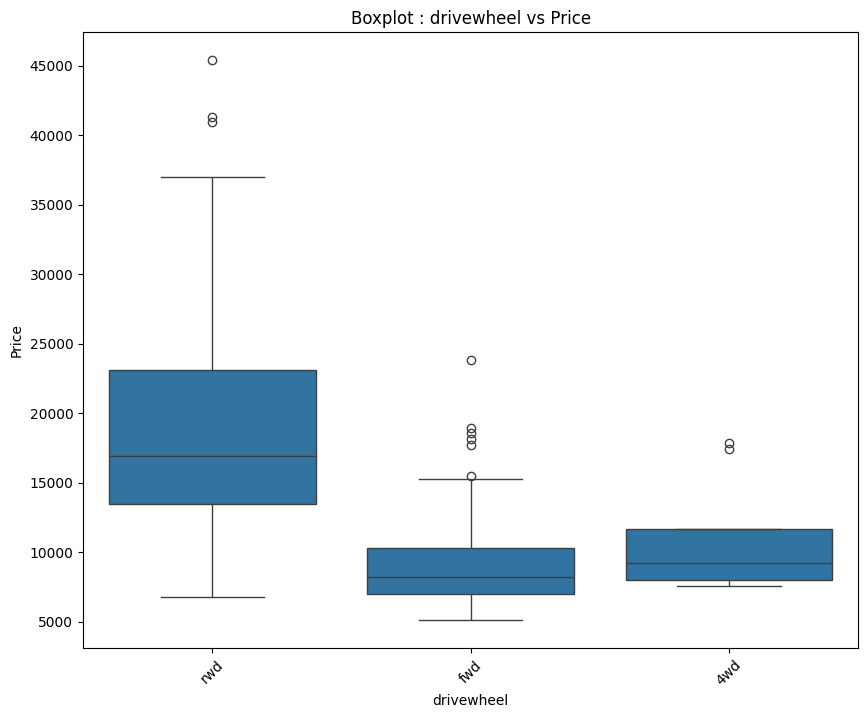

count     205
unique    3  
top       fwd
freq      120
Name: drivewheel, dtype: object


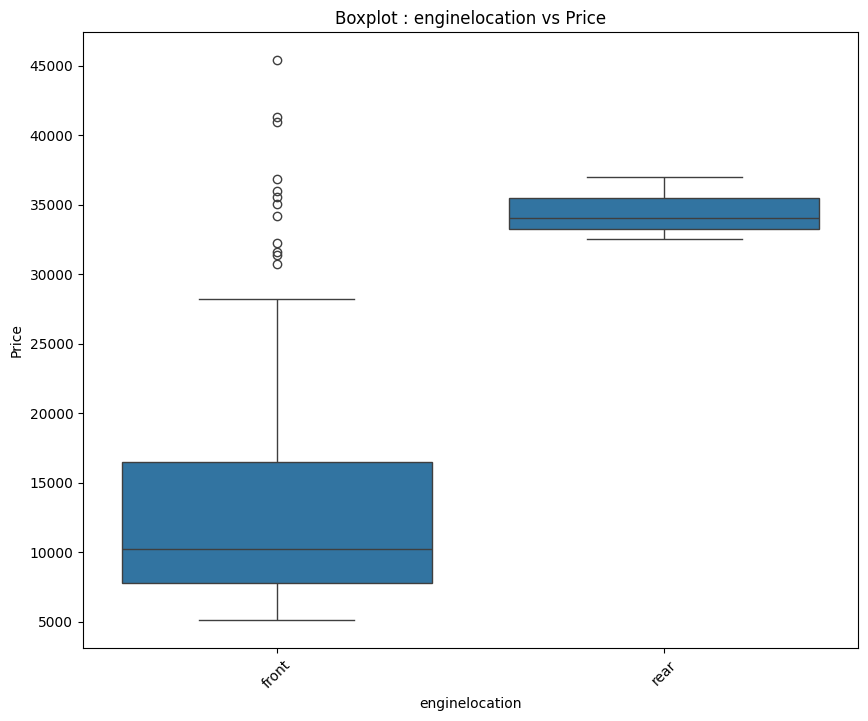

count     205  
unique    2    
top       front
freq      202  
Name: enginelocation, dtype: object


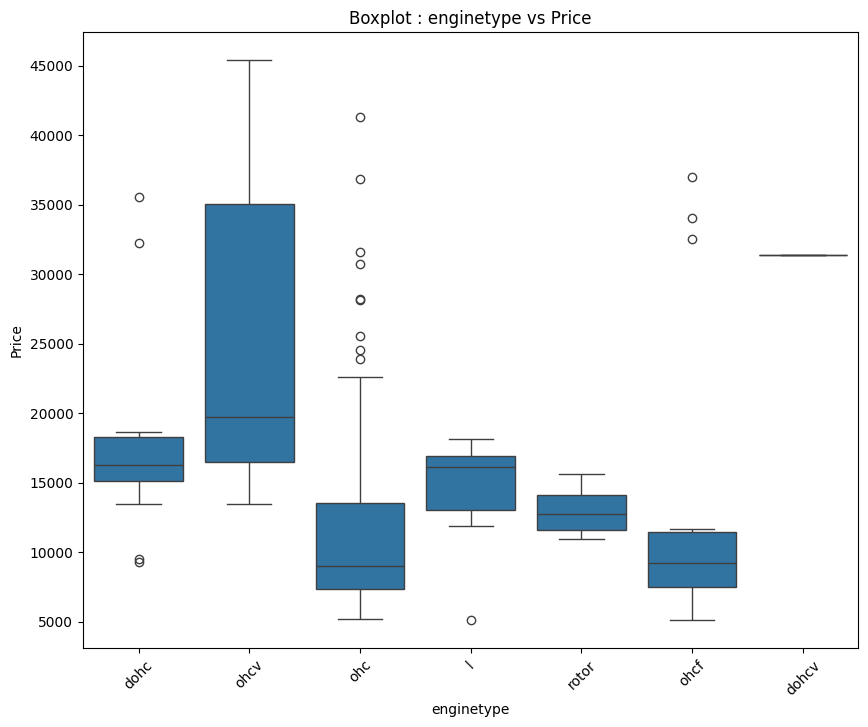

count     205
unique    7  
top       ohc
freq      148
Name: enginetype, dtype: object


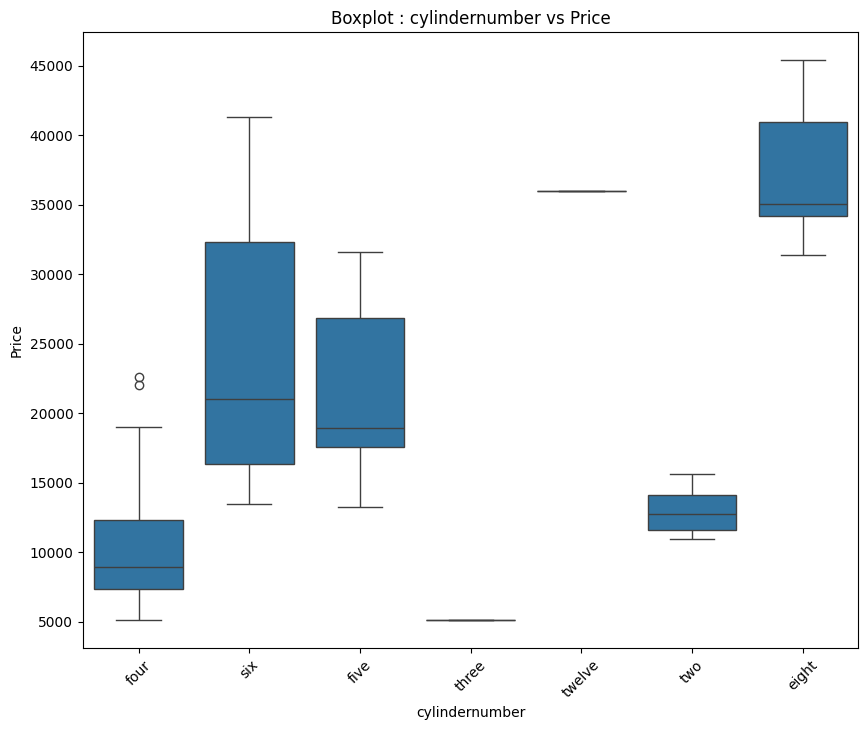

count     205 
unique    7   
top       four
freq      159 
Name: cylindernumber, dtype: object


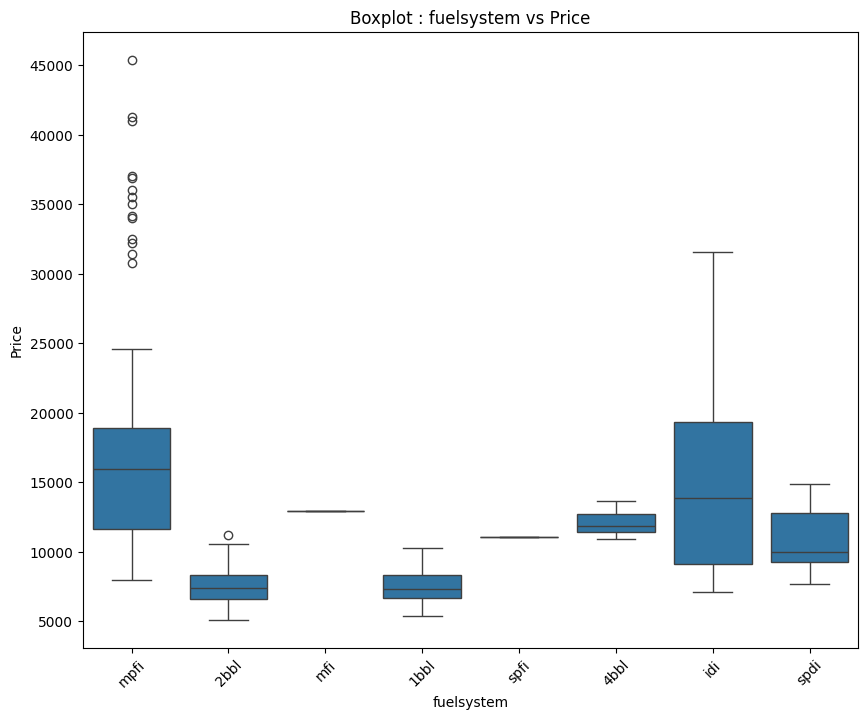

count     205 
unique    8   
top       mpfi
freq      94  
Name: fuelsystem, dtype: object


In [99]:
for column in Categorical_columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f'Boxplot : {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()
    print(df[column].describe())

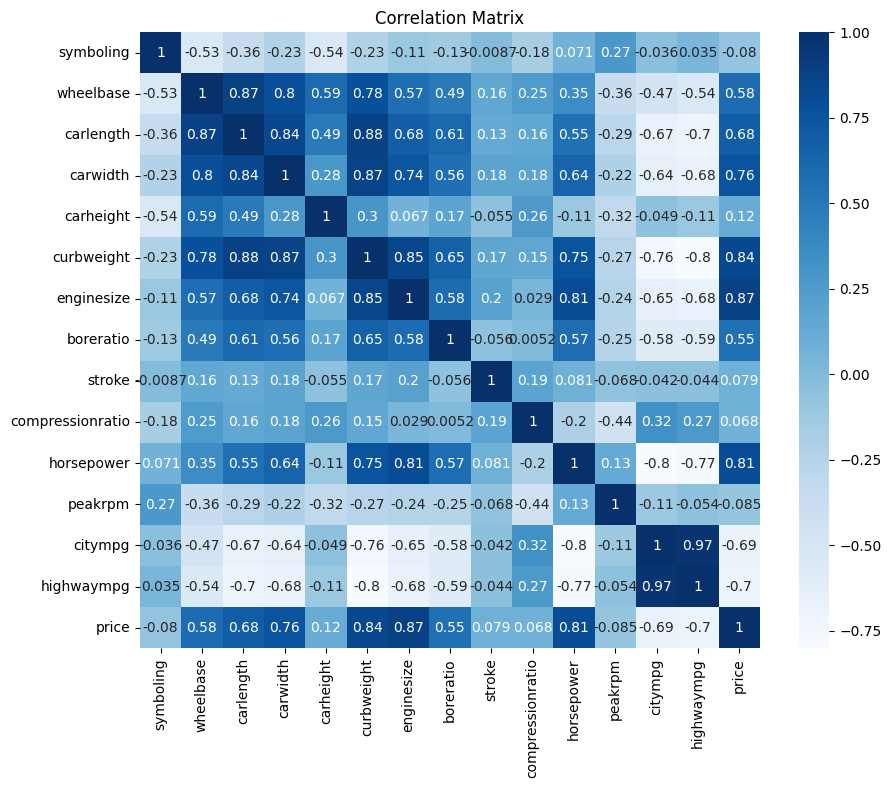

In [100]:
correlation_matrix=df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [101]:
#Encoding categorical data
Label_encoder = LabelEncoder()
for column in Categorical_columns:
    df[column]=Label_encoder.fit_transform(df[column])
    

In [102]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1)


In [103]:
print(df)

        symboling  CarName  fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
car_ID                                                                                                                                                                                                                                                                                              
1       3          0        1         0           1           0        2           0               88.6       168.8      64.1      48.8       2548        0           2               130         5           3.47       2.68    9.0               111         5000     21       27          13495.0
2       3          0        1         0           1           0        2           0               88.6       168.8      

In [104]:
scaler=StandardScaler()

df=scaler.fit_transform(df)

df=pd.DataFrame(df)



In [105]:
print(df)

           0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24
0    1.743470 -1.945332  0.328798 -0.469295  1.130388 -3.050975  1.213330 -0.121867 -1.690772 -0.426521 -0.844782 -2.020417 -0.014566 -2.865105 -0.147475  0.074449  0.869568  0.519071 -1.839377 -0.288349  0.174483 -0.262960 -0.646553 -0.546059  0.027391
1    1.743470 -1.945332  0.328798 -0.469295  1.130388 -3.050975  1.213330 -0.121867 -1.690772 -0.426521 -0.844782 -2.020417 -0.014566 -2.865105 -0.147475  0.074449  0.869568  0.519071 -1.839377 -0.288349  0.174483 -0.262960 -0.646553 -0.546059  0.404461
2    0.133509 -1.945332  0.328798 -0.469295  1.130388 -0.717207  1.213330 -0.121867 -0.708596 -0.231513 -0.190566 -0.543527  0.514882  1.886890  1.112210  0.604046  0.869568 -2.404880  0.685946 -0.288349  1.264536 -0.262960 -0.953012 -0.6

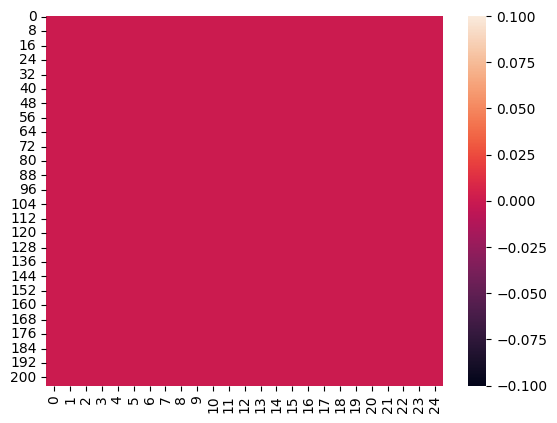

<Figure size 10000x8000 with 0 Axes>

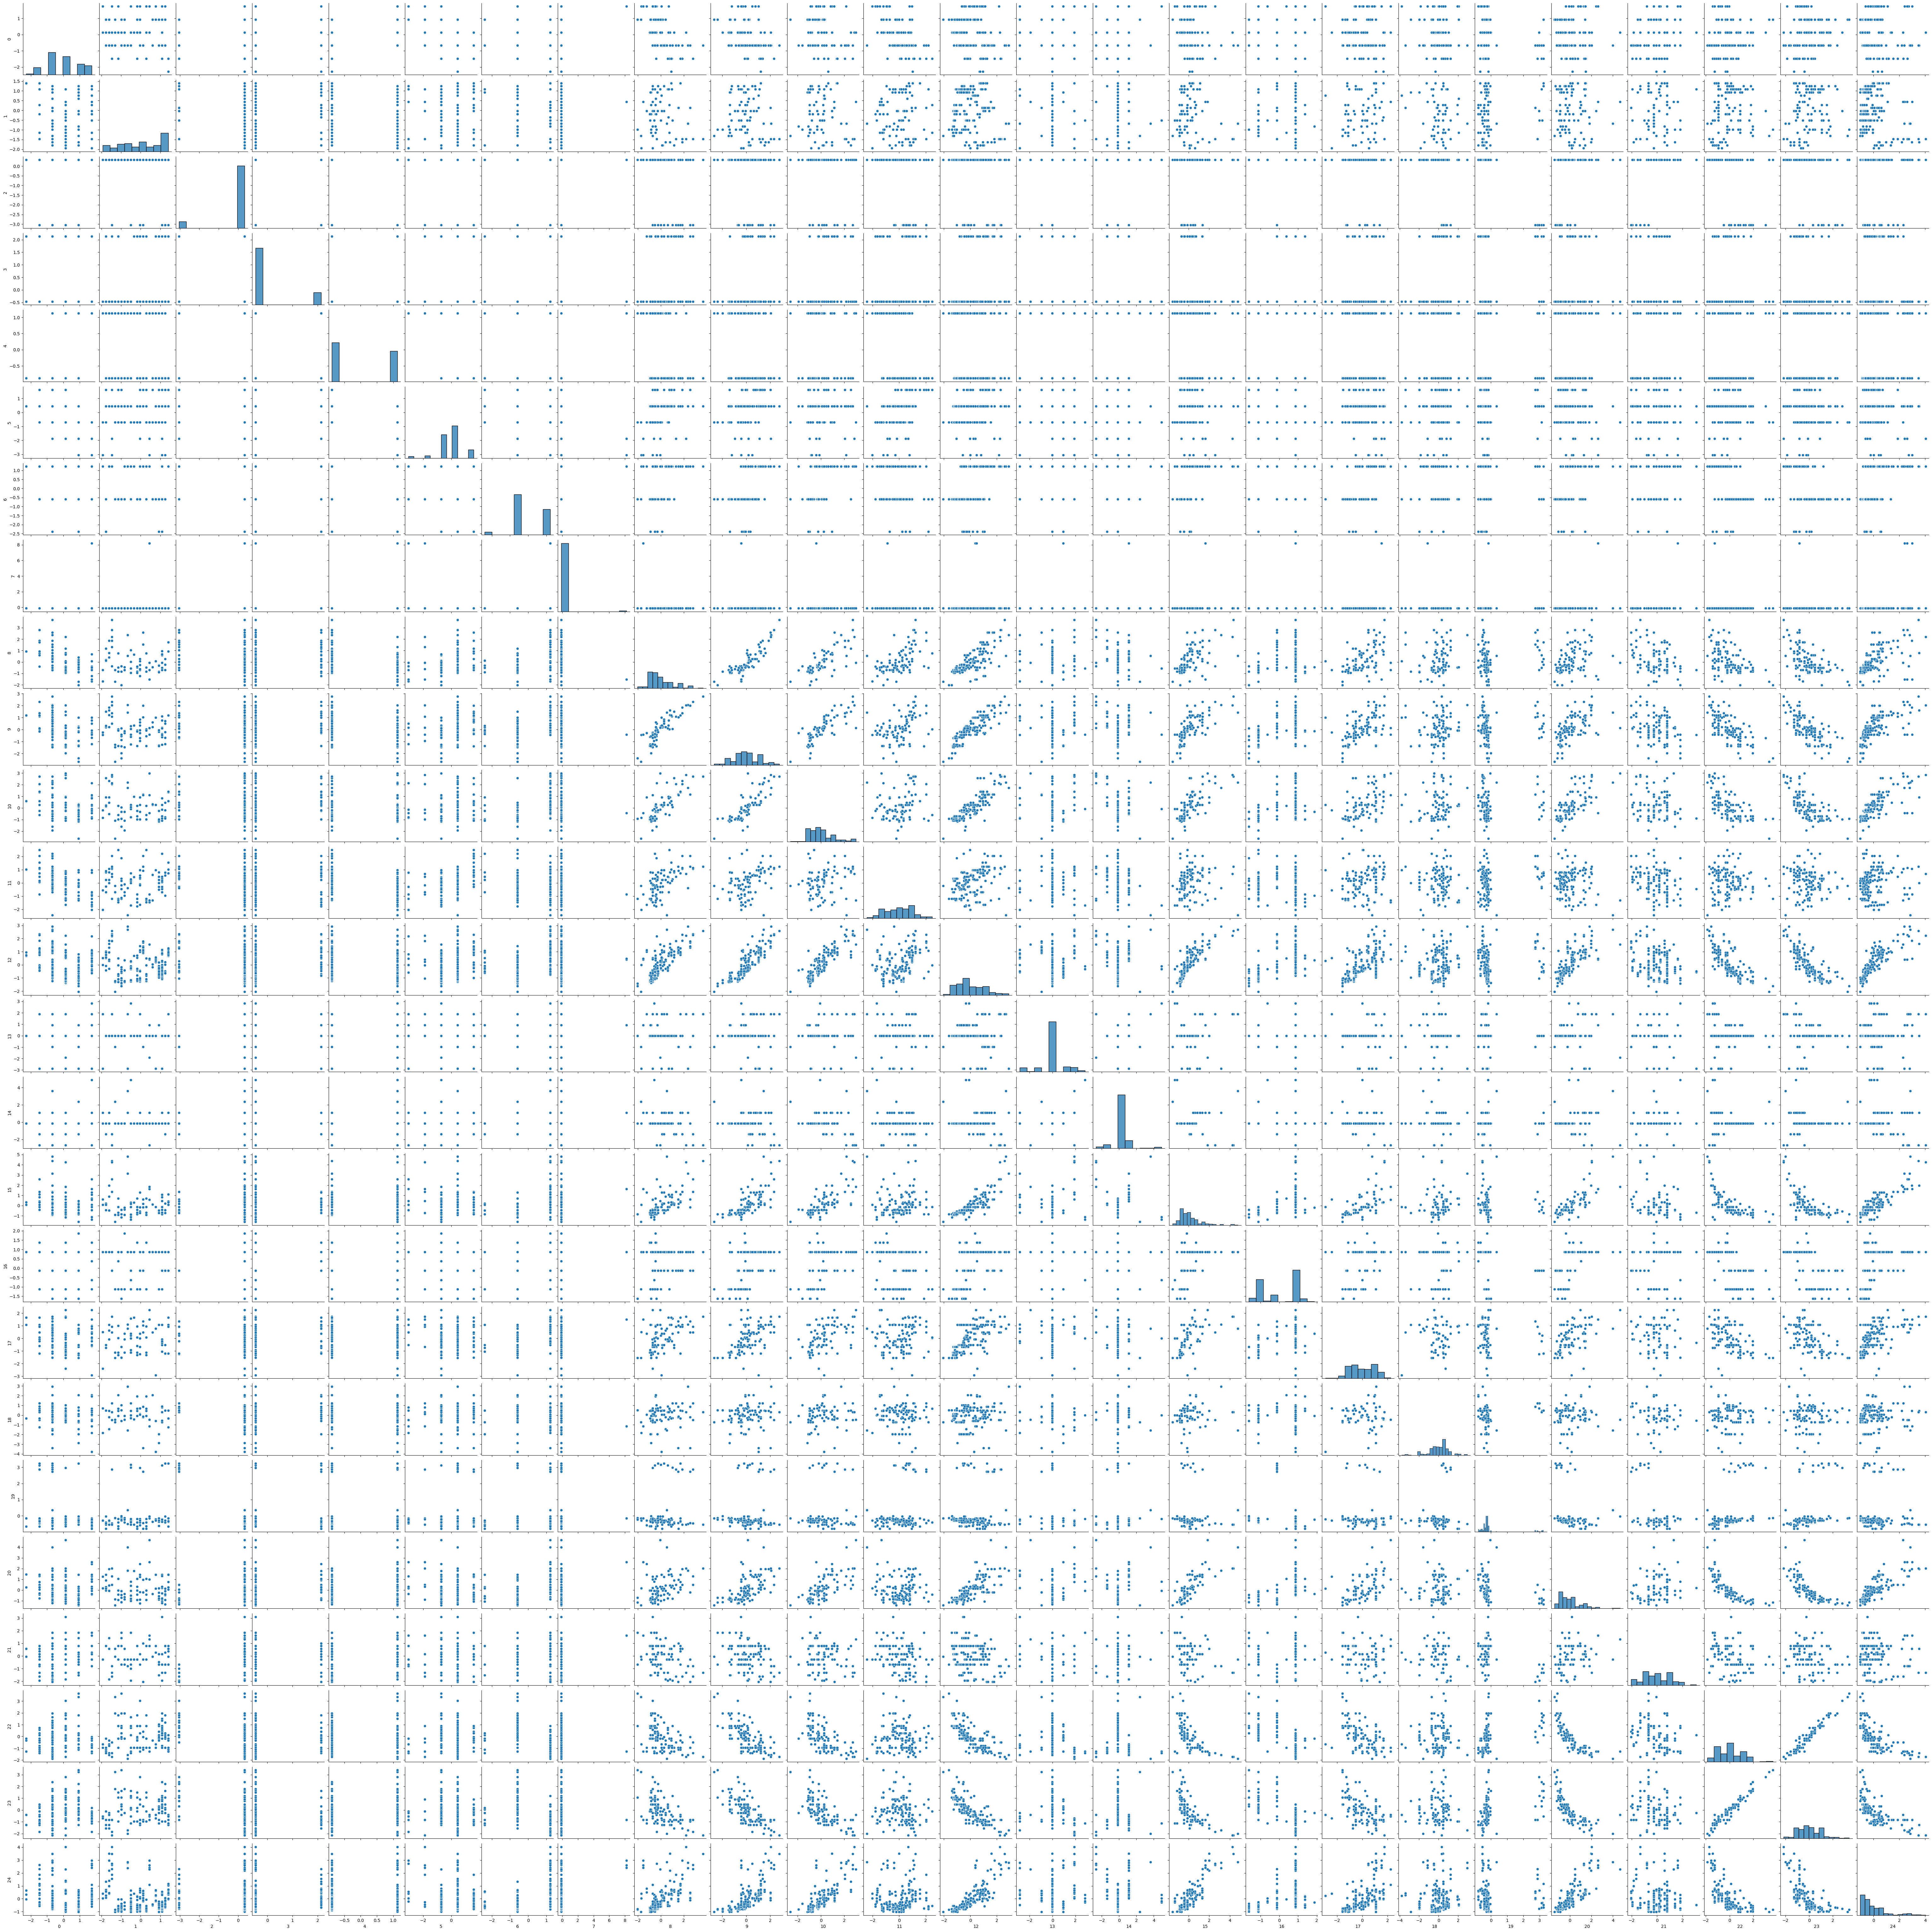

In [121]:
sns.heatmap(df.isnull())
plt.figure(figsize=(100,80))
sns.pairplot(df)
plt.show()


In [106]:
Cols=df.shape[1]
Rows=df.shape[0]

x=df.iloc[:, :Cols-1]
y=df.iloc[:,Cols-1:Cols]


In [107]:
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
print(regressor_OLS.summary())
p_values=[]
print(type(p_values))
p_values=regressor_OLS.pvalues
get_id=[]
num=0
for i in p_values:
    if(i<0.05):
        get_id.append(num)
    num=num+1

print(get_id)


                                 OLS Regression Results                                
Dep. Variable:                     24   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              67.86
Date:                Thu, 01 Feb 2024   Prob (F-statistic):                    1.73e-77
Time:                        17:24:46   Log-Likelihood:                         -54.889
No. Observations:                 205   AIC:                                      157.8
Df Residuals:                     181   BIC:                                      237.5
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [108]:
x=np.append(arr = np.ones((Rows,1)).astype(int),values= x,axis=1)

x_opt=x[:,[1, 5, 7, 10, 11, 15, 18, 21]]

regressor_OLS_opt=sm.OLS(endog=y,exog=x_opt).fit()
print(regressor_OLS_opt.summary())

# x=x_opt

                                 OLS Regression Results                                
Dep. Variable:                     24   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              83.86
Date:                Thu, 01 Feb 2024   Prob (F-statistic):                    2.90e-59
Time:                        17:24:46   Log-Likelihood:                         -138.89
No. Observations:                 205   AIC:                                      293.8
Df Residuals:                     197   BIC:                                      320.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [112]:
x=x_opt
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=42)
#Reshaping output variables to 1D array
Y_train=Y_train.squeeze()
Y_test=Y_test.squeeze() 

In [113]:
#creating our ML models
Models={"Linear regression model":LinearRegression(),
        "Decision tree regressor":DecisionTreeRegressor(),
        "Random forest regressor":RandomForestRegressor(120),
        "Suppor vector Machine(SVR)":SVR(),
        "KNeighborsRegressor":KNeighborsRegressor(4)
        }

In [114]:
#Creating lists to put each model variable in it
Models_Accuracy=[]
MSE=[]
Models_Score=[]
predicted_y_array=[]

In [115]:
#Making for loop for all models and save each model variable in lists we've created in previous note
for Modelkey,Model_value in Models.items():
    regressor=Model_value
    #training Ml model
    regressor.fit(X_train, Y_train)
    #predicting Y value for X_test
    predicted_y=regressor.predict(X_test)
    r2_square = r2_score(Y_test,predicted_y)
    mse = mean_squared_error(Y_test, predicted_y)
    score = regressor.score(X_train, Y_train)
    Models_Accuracy.append(r2_square)
    MSE.append(mse)
    Models_Score.append(score)
    predicted_y_array.append(predicted_y)

In [116]:
#Saving each model variables in Dictionary
Models_info_Dic = {"Models name":list(Models.keys()),
                   "Models Accuracy":Models_Accuracy,
                  "Models Score":Models_Score,
                  "Mean Square Error":MSE,
                  "Predicted_y":predicted_y_array,
                  }

In [117]:
#Printing each model name and its Accuracy and MSE
for Model_Name, Model_Accuracy, Model_Square_Error, Model_Score, predicted_yy in zip(Models_info_Dic['Models name'],Models_info_Dic['Models Accuracy'], Models_info_Dic['Mean Square Error'],Models_info_Dic['Models Score'],Models_info_Dic['Predicted_y']):
    print(f'Model ({Model_Name}) has Achived Accuracy : {np.round((Model_Accuracy*100),3)} % and Mean Squared Error :{np.round((Model_Square_Error),4)}')

Model (Linear regression model) has Achived Accuracy : 75.976 % and Mean Squared Error :0.2986
Model (Decision tree regressor) has Achived Accuracy : 75.184 % and Mean Squared Error :0.3085
Model (Random forest regressor) has Achived Accuracy : 91.738 % and Mean Squared Error :0.1027
Model (Suppor vector Machine(SVR)) has Achived Accuracy : 78.725 % and Mean Squared Error :0.2645
Model (KNeighborsRegressor) has Achived Accuracy : 83.528 % and Mean Squared Error :0.2047


In [118]:
#Getting the index of the best model
Highest_model_in_Accuracy_index = Models_info_Dic['Models Accuracy'].index(max(Models_info_Dic['Models Accuracy']))

In [119]:
#Printing best model info
print(f"Highest model in Accuracy is ({Models_info_Dic['Models name'][Highest_model_in_Accuracy_index]}) and has Achived Accuracy : ({np.round((Models_info_Dic['Models Accuracy'][Highest_model_in_Accuracy_index]*100),3)} %)")

Highest model in Accuracy is (Random forest regressor) and has Achived Accuracy : (91.738 %)


In [120]:
#Getting predicted_y and compare it to The actual y and showing the differnce between them
predicted_y=Models_info_Dic['Predicted_y'][Highest_model_in_Accuracy_index]
actual_predicted_dataframe=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':predicted_y,'Difference':abs(Y_test-predicted_y)})
print(actual_predicted_dataframe)

     Actual Value  Predicted Value  Difference
15   2.193818      1.831690         0.362128  
9    0.575011      0.533173         0.041838  
100 -0.467756     -0.463318         0.004439  
132 -0.179025      0.144561         0.323586  
68   1.878610      1.743113         0.135497  
95  -0.687348     -0.837170         0.149822  
159 -0.688728     -0.696663         0.007935  
162 -0.504271     -0.724187         0.219916  
147 -0.386319     -0.363397         0.022922  
182 -0.690359     -0.647925         0.042434  
191  0.002295      0.270524         0.268229  
164 -0.632262     -0.637567         0.005306  
65   0.627817      0.353837         0.273980  
175 -0.412670     -0.374820         0.037851  
73   3.473723      3.253638         0.220085  
152 -0.851853     -0.837938         0.013915  
18  -1.019621     -0.934715         0.084906  
82  -0.081275      0.134114         0.215389  
86  -0.638410     -0.720110         0.081699  
143 -0.416184     -0.367051         0.049132  
60  -0.600013